### Import packages

In [1]:
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib as plt

### Import csv file

In [2]:
df_flights = pd.read_csv('df_flights.csv')

### Explore dataset

In [3]:
df_flights.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,31025.000000,31025.000000,31025.000000,31025.000000,31025.000000,30508.000000,30490.000000,30463.000000,30463.000000,30449.000000,...,31025.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,234.000000,234.000000,234.000000,0.0
mean,2700.955842,2700.858211,12695.080258,12641.773602,1335.790814,1339.755179,10.369859,17.463546,1363.760234,1465.798647,...,762.047027,20.555402,2.744512,16.449092,0.068626,27.642869,1339.337607,39.393162,39.094017,NaN
std,1842.763667,1842.645150,1520.557466,1528.540647,490.184128,504.542028,46.629459,10.178399,506.067714,531.118761,...,578.921044,65.332412,24.508976,36.229189,1.509751,52.314644,511.188619,34.587069,34.566595,NaN
min,1.000000,1.000000,10135.000000,10135.000000,2.000000,1.000000,-29.000000,0.000000,1.000000,1.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,1.000000,NaN
25%,1102.000000,1102.000000,11292.000000,11292.000000,920.000000,921.000000,-6.000000,11.000000,936.000000,1047.000000,...,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,903.250000,17.000000,16.000000,NaN
50%,2264.000000,2264.000000,12889.000000,12889.000000,1330.000000,1334.000000,-2.000000,15.000000,1348.000000,1506.000000,...,599.000000,0.000000,0.000000,3.000000,0.000000,4.000000,1337.500000,28.500000,28.500000,NaN
75%,4290.000000,4289.000000,14057.000000,14027.000000,1736.000000,1746.250000,6.000000,20.000000,1801.000000,1912.000000,...,993.000000,18.000000,0.000000,20.000000,0.000000,34.000000,1739.750000,46.750000,46.000000,NaN
max,7438.000000,7438.000000,16218.000000,16869.000000,2359.000000,2400.000000,1361.000000,164.000000,2400.000000,2400.000000,...,4983.000000,1350.000000,833.000000,793.000000,69.000000,1054.000000,2342.000000,173.000000,173.000000,NaN


In [4]:
df_flights[df_flights['origin_city_name'] == 'Chicago, IL']

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,1997,WN,N733SA,1997,13232,MDW,...,405.0,10.0,0.0,0.0,0.0,26.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,181,WN,N8633A,181,13232,MDW,...,990.0,11.0,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,185,WN,N8625A,185,13232,MDW,...,990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,403,WN,N564WN,403,13232,MDW,...,990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1229,WN,N8305E,1229,13232,MDW,...,990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30908,2019-07-28,WN,WN,WN,5557,WN,N290WN,5557,13232,MDW,...,825.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30952,2019-07-29,AA,AA,AA,2872,AA,N9023N,2872,13930,ORD,...,296.0,56.0,0.0,51.0,0.0,0.0,NaN,NaN,NaN,NaN
30965,2019-07-29,AA,AA,AA,2881,AA,N818NN,2881,13930,ORD,...,258.0,0.0,11.0,9.0,0.0,14.0,NaN,NaN,NaN,NaN
30986,2019-07-30,NK,NK,NK,409,NK,N656NK,409,13930,ORD,...,1182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_flights.iloc[:,7:45]

,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,1997,13232,MDW,"Chicago, IL",13198,MCI,"Kansas City, MO",1920,2003.0,43.0,...,405.0,10.0,0.0,0.0,0.0,26.0,NaN,NaN,NaN,NaN
1,181,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",855,947.0,52.0,...,990.0,11.0,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN
2,185,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1250,1307.0,17.0,...,990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,403,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1615,1617.0,2.0,...,990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1229,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",700,719.0,19.0,...,990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31020,3290,15412,TYS,"Knoxville, TN",12953,LGA,"New York, NY",805,749.0,-16.0,...,648.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31021,3291,10721,BOS,"Boston, MA",13931,ORF,"Norfolk, VA",605,555.0,-10.0,...,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31022,3292,11193,CVG,"Cincinnati, OH",11298,DFW,"Dallas/Fort Worth, TX",700,655.0,-5.0,...,812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31023,3292,11298,DFW,"Dallas/Fort Worth, TX",11193,CVG,"Cincinnati, OH",906,858.0,-8.0,...,812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_flights.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                 131
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                 517
dep_delay                535
taxi_out                 562
wheels_off               562
wheels_on                576
taxi_in                  576
crs_arr_time               0
arr_time                 549
arr_delay                622
cancelled                  0
cancellation_code      30487
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time      612
air_time                 639
flights                    0
distance                   0
carrier_delay          25240
weather_delay 

### Fill in null (NaN) values

In [7]:
df_flights['carrier_delay'] = df_flights['carrier_delay'].fillna(0.0)
df_flights['weather_delay']	= df_flights['weather_delay'].fillna(0.0)
df_flights['nas_delay']	= df_flights['nas_delay'].fillna(0.0)
df_flights['security_delay'] = df_flights['security_delay'].fillna(0.0)
df_flights['late_aircraft_delay'] = df_flights['late_aircraft_delay'].fillna(0.0)

In [8]:
df_flights['dep_delay'].fillna(0, inplace=True)   # no difference in scheduled and departure time, so 0 delay

In [9]:
df_flights['tail_num']=df_flights['tail_num'].fillna('Unknown') # add unknown to tail numbers if not there

### Drop columns with high number of missing values

In [10]:
df_flights.drop(['first_dep_time', 'cancellation_code', 'total_add_gtime', 
                 'longest_add_gtime', 'no_name'], axis=1, inplace=True)

In [11]:
for index, row in df_flights.iterrows():  # get rid of cancelled flights
    if row['cancelled'] == 1.0:
        df_flights.drop(index=index, inplace=True)

In [12]:
df_flights['arr_delay'] = df_flights['arr_delay'].fillna('none')
for index, row in df_flights.iterrows():   # drop rows missing target variable
    if row['arr_delay'] == 'none':
        df_flights.drop(index=index, inplace=True)

In [13]:
df_flights['wheels_off'] = df_flights['wheels_off'].fillna('none')
for index, row in df_flights.iterrows():   # dropping rows missing datetime information
    if row['wheels_off'] == 'none':
        df_flights.drop(index=index, inplace=True)

In [14]:
df_flights.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

### Data Exploration

In [15]:
tail_num = list(df_flights['tail_num'].unique())
print(len(tail_num))

5663


In [16]:
df_flights['op_unique_carrier'].unique()

array(['WN', 'DL', 'MQ', 'YV', 'PT', 'UA', 'OO', 'EV', 'G7', 'YX', '9E',
       'G4', 'AA', 'CP', 'QX', 'NK', 'AX', 'HA', 'B6', 'OH', 'AS', 'F9',
       'ZW', 'C5', 'EM', 'KS', 'VX'], dtype=object)

In [17]:
df_flights['carrier_name'] = ''

my_dict ={
    'UA':'United Airlines',
    'PT':'Piedmont Airlines',
    'G7':'Lindbergh Airlines',
    'CP':'Compass Airlines',
    'QX':'Horizon Airlines',
    'AX':'Trans States Airlines',
    'ZW':'Air Wisconsin',
    'C5':'CommutAir',
    'EM':'Anderson Aviation',
    'KS':'Peninsula Airways',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}

for word in my_dict.keys():
    df_flights.loc[df_flights['op_unique_carrier'].str.contains(word, na=False), 
                   ['carrier_name']] = my_dict[word]

In [18]:
df_flights.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off              object
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay               object
cancelled              float64
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance               float64
carrier_

In [19]:
df_flights['arr_delay'] = df_flights['arr_delay'].astype(int) #Change 'arr_delay' dtype to int


df_flights['delayed'] = 0 #Add new column to categorize delayed flights

df_flights.loc[df_flights['arr_delay'] > 0, 'delayed'] = 1

<AxesSubplot:ylabel='carrier_name'>

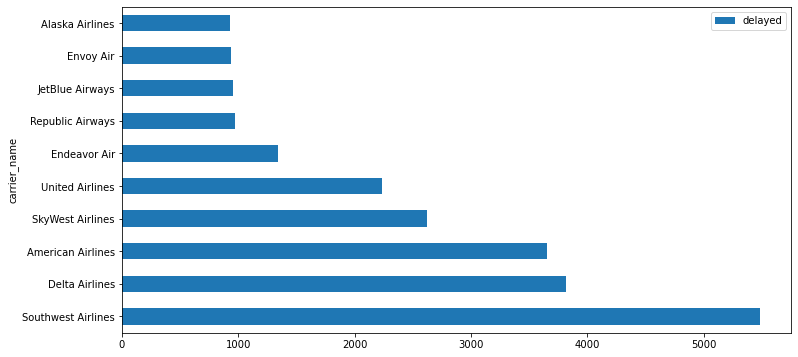

In [20]:
#Bar Chart for most delayed flights in dataset grouped by carrier name
df_flights_chart = df_flights.loc[:, ['carrier_name', 'delayed']].groupby('carrier_name').count().sort_values(by='delayed', 
                            ascending=False).head(10)

df_flights_chart.plot(kind ='barh', figsize=(12,6))

In [21]:
#Add Column - delayed airlines by percentage
flights_grouped = df_flights.groupby('carrier_name').count().sort_values(by='fl_date', 
                            ascending=False).head(10)


flights_grouped['% of flights delayed'] = flights_grouped['arr_delay']/22940*100

In [22]:
flights_grouped.reset_index(inplace=True)
flights_grouped

,carrier_name,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delayed,% of flights delayed
0,Southwest Airlines,5480,5480,5480,5480,5480,5480,5480,5480,5480,...,5480,5480,5480,5480,5480,5480,5480,5480,5480,23.888405
1,Delta Airlines,3815,3815,3815,3815,3815,3815,3815,3815,3815,...,3815,3815,3815,3815,3815,3815,3815,3815,3815,16.630340
2,American Airlines,3650,3650,3650,3650,3650,3650,3650,3650,3650,...,3650,3650,3650,3650,3650,3650,3650,3650,3650,15.911072
3,SkyWest Airlines,2620,2620,2620,2620,2620,2620,2620,2620,2620,...,2620,2620,2620,2620,2620,2620,2620,2620,2620,11.421099
4,United Airlines,2239,2239,2239,2239,2239,2239,2239,2239,2239,...,2239,2239,2239,2239,2239,2239,2239,2239,2239,9.760244
5,Endeavor Air,1339,1339,1339,1339,1339,1339,1339,1339,1339,...,1339,1339,1339,1339,1339,1339,1339,1339,1339,5.836966
6,Republic Airways,974,974,974,974,974,974,974,974,974,...,974,974,974,974,974,974,974,974,974,4.245859
7,JetBlue Airways,957,957,957,957,957,957,957,957,957,...,957,957,957,957,957,957,957,957,957,4.171752
8,Envoy Air,940,940,940,940,940,940,940,940,940,...,940,940,940,940,940,940,940,940,940,4.097646
9,Alaska Airlines,926,926,926,926,926,926,926,926,926,...,926,926,926,926,926,926,926,926,926,4.036617


<AxesSubplot:xlabel='% of flights delayed', ylabel='carrier_name'>

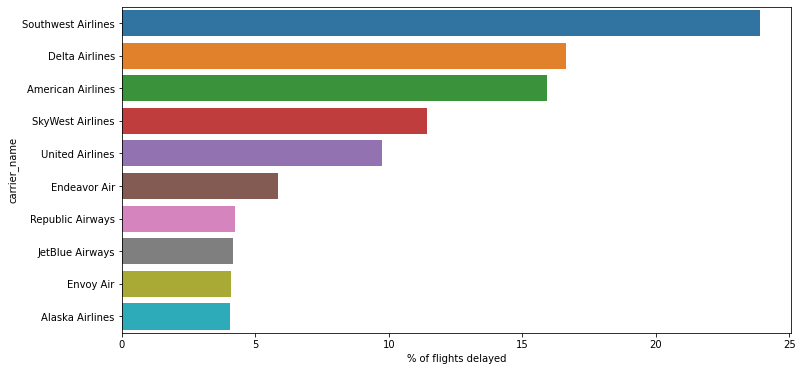

In [23]:
#Bar Chart for most delayed flights as a percentage of the dataset (top 10 airlines)
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x='% of flights delayed', y = 'carrier_name', data=flights_grouped)


<AxesSubplot:ylabel='origin_city_name'>

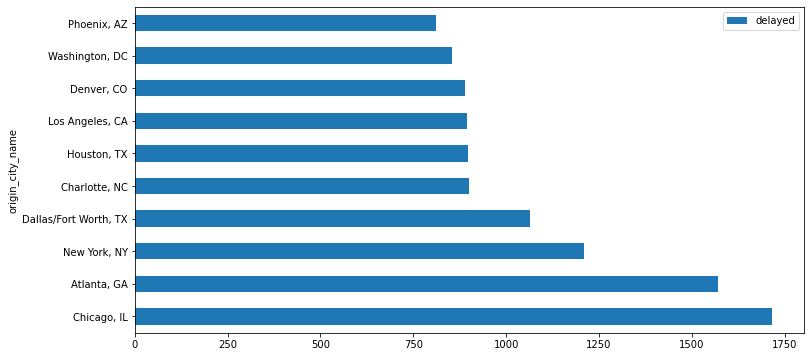

In [24]:
df_flights_chart = df_flights.loc[:, ['origin_city_name', 'delayed']].groupby('origin_city_name').count().sort_values(by='delayed', 
                            ascending=False).head(10)

df_flights_chart.plot(kind ='barh', figsize=(12,6))

In [25]:
#Add Column - delayed airlines by percentage (from origin city)

origin_city = df_flights.groupby('origin_city_name').count().sort_values(by='arr_delay', 
                            ascending=False).head(10)

origin_city['% delayed by origin'] = origin_city['arr_delay']/10805*100

In [26]:
origin_city = df_flights.groupby('origin_city_name').count().sort_values(by='arr_delay', 
                            ascending=False).head(10)

In [28]:
origin_city = df_flights.groupby('origin_city_name').count().sort_values(by='arr_delay', 
                            ascending=False).head(10)

In [29]:
#yeah basically the columns have delays by minutes and NaN if there is no delay. So I total the delays in 
#minutes (for each column) and divide by the number of flights run. 
#That would give us how likely on average is a plane expected to be delayed by security for example


df_delays = df_flights.loc[:, ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
                               'delayed']].groupby('delayed').count().head(10)


df_delays
origin_city.reset_index(inplace=True) #reindex grouped dataframe

In [30]:
#Add Column - delayed airlines by percentage - FOR DELAYED FLIGHTS ONLY

carrier_delayed = df_flights[df_flights['delayed'] == 1]


carrier_delayed = carrier_delayed.groupby('carrier_name').count().sort_values(by='fl_date', 
                            ascending=False).head(10)

carrier_delayed['% of flights delayed'] = carrier_delayed['arr_delay']/7940*100

<AxesSubplot:xlabel='% of flights delayed', ylabel='carrier_name'>

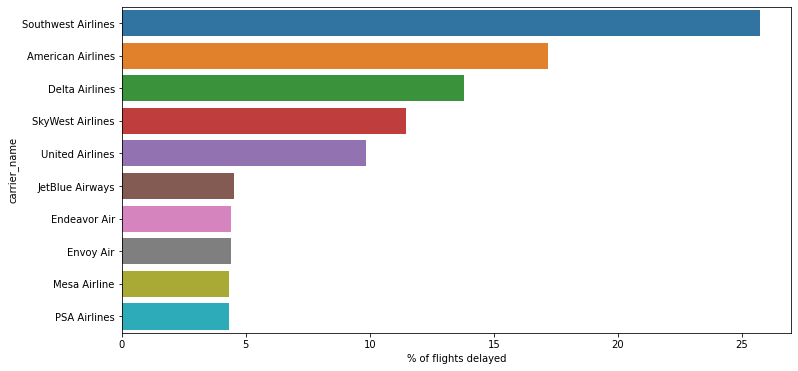

In [31]:
#Plot the graph

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x='% of flights delayed', y = 'carrier_name', data=carrier_delayed.reset_index())

In [32]:
#Add Column - delayed airlines by percentage (from origin city) - DELAYED FLIGHTS ONLY

origin_delayed = df_flights[df_flights['delayed'] == 1]


origin_delayed = origin_delayed.groupby('origin_city_name').count().sort_values(by='arr_delay', 
                            ascending=False).head(30)

origin_delayed['% delayed by origin'] = origin_delayed['arr_delay']/4065*100

<AxesSubplot:xlabel='% delayed by origin', ylabel='origin_city_name'>

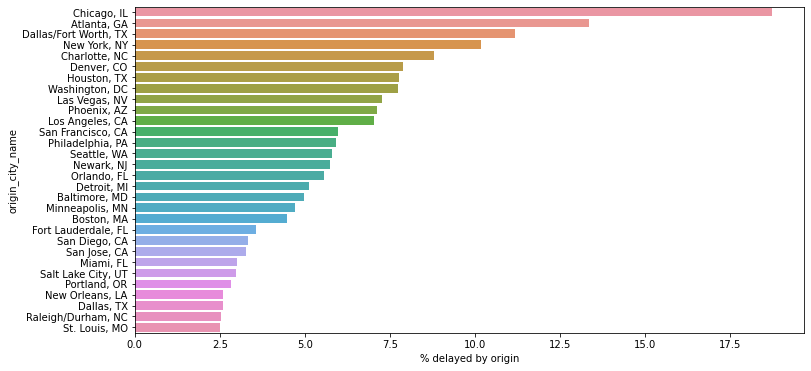

In [33]:
#Plot the chart

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x='% delayed by origin', y = 'origin_city_name', data=origin_delayed.reset_index())

#### How taxi times changing during the day? Does higher traffic lead to bigger taxi times?